In [1]:

import MetaTrader5 as mt5
import pandas as pd
import datetime
import mplfinance as mpf
import pandas_ta as ta

if not mt5.initialize():
    print("initialize() failed")
    mt5.shutdown()

In [20]:
symbol = "ETHUSD"
data = pd.DataFrame(mt5.copy_rates_from_pos(
            symbol,
            mt5.TIMEFRAME_M5,
            0,
            200
        ))

data["time"] = pd.to_datetime(data["time"], unit="s")

# convert to local time
seven_hours = datetime.timedelta(hours=7)
data["Date"] = data["time"] - seven_hours

# create index
data = data.set_index("Date")
data.sort_index(ascending=False, inplace=True)

# sort ascending for chart
chart_data = data.sort_index( ascending=True, inplace=False)

result  = data.ta.cdl_pattern(name="all")
bull = result.loc[ result["CDL_ENGULFING"] > 0]
bull["CDL_ENGULFING"]

Date
2023-12-15 06:20:00    100.0
2023-12-14 19:05:00    100.0
Name: CDL_ENGULFING, dtype: float64

Date
2023-12-15 06:20:00    100.0
2023-12-14 19:05:00    100.0
Name: CDL_ENGULFING, dtype: float64

In [18]:
result.iloc[0]["CDL_ENGULFING"]


0.0

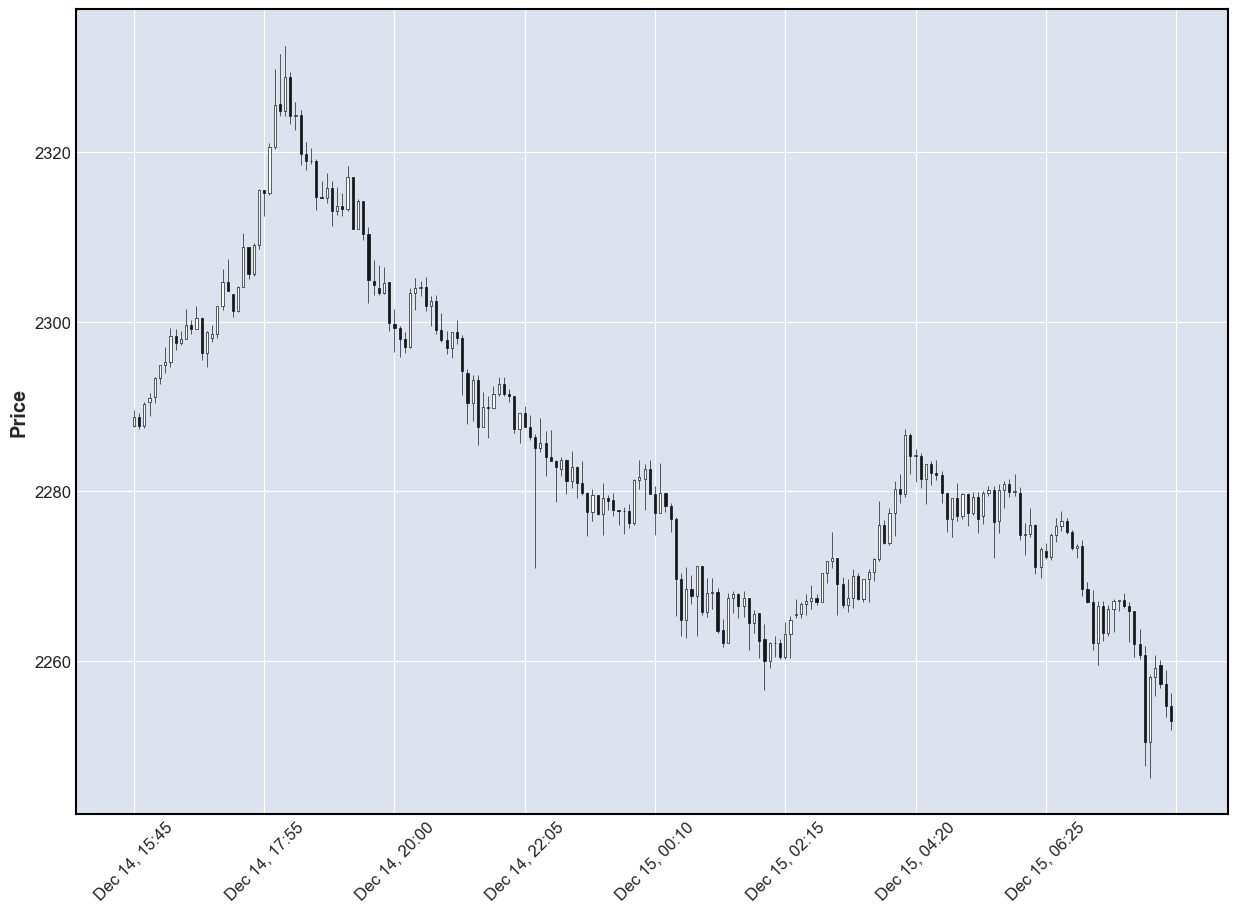

In [21]:
# upper case column names because charting library requires it 
chart_data = chart_data.rename(columns={"open": "Open", "close": "Close", "high": "High", "low": "Low", "tick_volume": "Volume"})

mpf.plot(chart_data, type="candle", figscale=2.0)


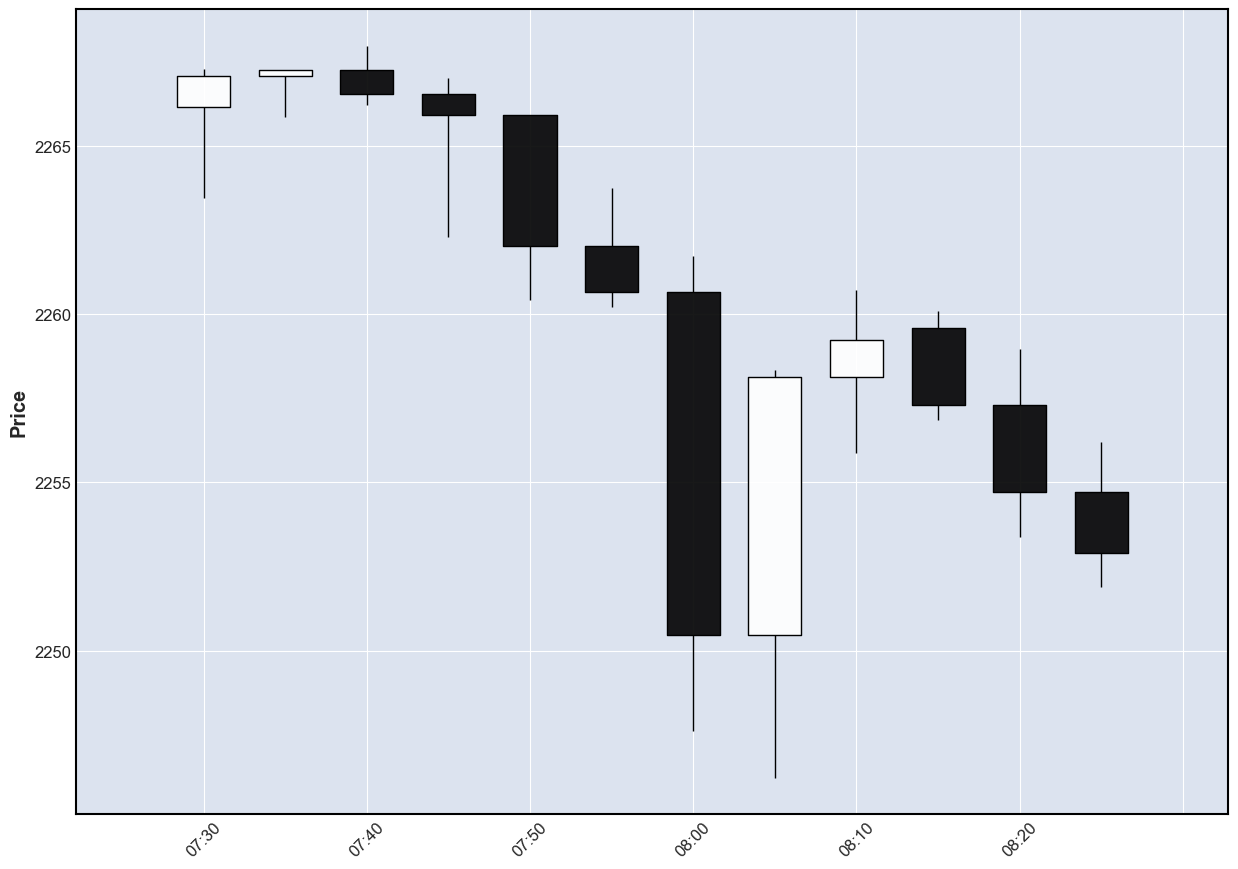

In [22]:


# let's isolate a case where we want to open a trade
focus_data =  chart_data.between_time('7:30', '9:30')

mpf.plot(focus_data, type="candle", figscale=2.0)



In [248]:


def set_cndl_up_or_down(row):
    if row["cndl_body_size"] > 0:
        return "up"
    else:
        return "down"




In [249]:

focus_data["cndl_body_size"] = focus_data["Close"] - focus_data["Open"]
focus_data["cndl_direction"] = focus_data.apply(set_cndl_up_or_down, axis=1)
focus_data

C:\Users\micha\AppData\Local\Temp\ipykernel_16832\2222612621.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  focus_data["cndl_body_size"] = focus_data["Close"] - focus_data["Open"]
C:\Users\micha\AppData\Local\Temp\ipykernel_16832\2222612621.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  focus_data["cndl_direction"] = focus_data.apply(set_cndl_up_or_down, axis=1)


,time,Open,High,Low,Close,Volume,spread,real_volume,cndl_body_size,cndl_direction
Date,,,,,,,,,,
2023-12-13 05:00:00,2023-12-13 12:00:00,2178.71,2179.19,2176.79,2178.76,438,146,0,0.05,up
2023-12-13 05:05:00,2023-12-13 12:05:00,2178.76,2180.24,2178.39,2180.09,245,146,0,1.33,up
2023-12-13 05:10:00,2023-12-13 12:10:00,2180.09,2181.52,2179.08,2181.25,232,146,0,1.16,up
2023-12-13 05:15:00,2023-12-13 12:15:00,2181.25,2181.92,2178.69,2178.78,320,146,0,-2.47,down
2023-12-13 05:20:00,2023-12-13 12:20:00,2178.78,2179.37,2175.55,2176.35,293,146,0,-2.43,down
2023-12-13 05:25:00,2023-12-13 12:25:00,2176.35,2176.47,2171.28,2172.80,240,146,0,-3.55,down
2023-12-13 05:30:00,2023-12-13 12:30:00,2172.80,2173.82,2169.80,2172.74,283,146,0,-0.06,down
2023-12-13 05:35:00,2023-12-13 12:35:00,2172.74,2178.69,2171.93,2174.75,466,146,0,2.01,up
2023-12-13 05:40:00,2023-12-13 12:40:00,2174.75,2175.83,2173.54,2174.44,220,146,0,-0.31,down


In [250]:
# is the last bar a bullish engulfing candle
current_bar = focus_data.iloc[-1]
previous_bar = focus_data.iloc[-2]

print(current_bar, previous_bar)

# count number of down bars out of last 7
#number_of_down_bars = len(data.tail(8).query("cndl_direction == 'down'"))


time              2023-12-13 14:05:00
Open                          2171.88
High                          2174.27
Low                            2169.7
Close                         2174.27
Volume                            517
spread                            146
real_volume                         0
cndl_body_size                   2.39
cndl_direction                     up
Name: 2023-12-13 07:05:00, dtype: object time              2023-12-13 14:00:00
Open                          2172.32
High                          2174.22
Low                           2171.43
Close                         2171.88
Volume                            582
spread                            146
real_volume                         0
cndl_body_size                  -0.44
cndl_direction                   down
Name: 2023-12-13 07:00:00, dtype: object


In [269]:

print(current_bar.Open, previous_bar.Close)


# lets make sure we were in an up or down trend before the change in direction
focus_data.sort_index( ascending=False, inplace=True)
down_days = len(focus_data.iloc[1:8].query("cndl_direction == 'down'"))
up_days = len(focus_data.iloc[1:8].query("cndl_direction == 'up'"))

is_down_trend = (
    True if down_days > 5
    else False
)

is_up_trend = (
    True if up_days > 4
    else False
)

# bullish check
is_covering_previous_candle_bullish = (
    True if current_bar.Close > previous_bar.Open and
    current_bar.Open <= previous_bar.Close
    else False
)

# bearish check
is_covering_previous_candle_bearish = (
    True if current_bar.Close < previous_bar.Open and
    current_bar.Open <= previous_bar.Close
    else False
)

is_bullish_engulfing = (
    True if current_bar.cndl_direction == "up" and previous_bar.cndl_direction == "down" and 
    abs(current_bar.cndl_body_size) > abs(previous_bar.cndl_body_size) and
    current_bar.Close > previous_bar.Open and
    current_bar.Open <= previous_bar.Close and
    down_days >= 4
    else False
)

is_bearish_engulfing = (
    True if current_bar.cndl_direction == "down" and previous_bar.cndl_direction == "up" and
    abs(current_bar.cndl_body_size) > abs(previous_bar.cndl_body_size) and 
    current_bar.Close < previous_bar.Open and
    current_bar.Open <= previous_bar.Close and
    up_days >= 4
    else False
)


if is_bullish_engulfing:
    print("Bullish Engulfing")
else:
    print("Bearish Engulfing")

2171.88 2171.88
Bullish Engulfing
